# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry of Optical for CTIO

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : February 28th 2017
- update : March 15th 2017
- update : May 21 2020
- update : May 25 2020

Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel.
Here 4 wavelength are generated.
The source incident angle must be provided in terms of angles $(\alpha_x,\alpha_y)$.


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Output filename and desired wavelength

In [4]:
root_filename="Beam4_Rayfile_"

In [5]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4

In [6]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBEAM)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBEAM), alpha=1)

In [7]:
Wavelength_B=0.0004
Wavelength_G=0.0006
Wavelength_R=0.0008
Wavelength_I=0.001

In [8]:
theta_x=0  # angle in arcmin
#theta_x=0.045*60.  # target offset in arcmin
theta_y=0  # angle in arcmin 

In [9]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [10]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [11]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [12]:
Beam4_Rayfile_EXCEL="Beam4_Rayfile_{:d}_allwl_{}_{}.xlsx".format(NBEAM*NWL,theta_x_str,theta_y_str)
Beam4_Rayfile_RAY="Beam4_Rayfile_{:d}_allwl_{}_{}.RAY".format(NBEAM*NWL,theta_x_str,theta_y_str)

In [13]:
Beam4_Rayfile_RAY

'Beam4_Rayfile_484_allwl_m00_m00.RAY'

## Constants for conversions

In [14]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [15]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [16]:
deg_to_rad=np.pi/180.

In [17]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [18]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

#Tel_Focal_Length=21.6 # m : Focal length of the telescope
#Tel_Diameter=1.2 # m : Diameter of the telesco

In [19]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

In [20]:
print("Aperture/D =  {} ".format(Tel_Fnum))

Aperture/D =  14.0 


In [21]:
alpha=Tel_Diameter/2./Tel_Focal_Length

In [22]:
print("Beam half angle alpha= {} degree".format(alpha*rad_to_deg))

Beam half angle alpha= 2.0462778397529404 degree


#### Filter

In [23]:
Filt_D=0.080 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#Filt_D=0.265 # m distance of the rotator plane wrt CCD plane
#Filt_size=3*inch_to_mm

In [24]:
Filt_size

76.19999999999999

#### Hologram

In [25]:
Holo_D=-0.058 # m distance to the CCD plane

#### CCD Detector

In [26]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [27]:
print('Detecteur size = {} mm'.format(Det_size))

Detecteur size = 49.152 mm


In [28]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [29]:
print("pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec)

pixel viewing angle in arcsec =  0.3928853452325645


In [30]:
fov =Det_pix_angl*Det_NbPix*rad_to_arcmin

In [31]:
print('Full FOV = {} arcmin'.format(fov))

Full FOV = 13.410486450604868 arcmin


In [32]:
theta_fov_max=30.
theta_fov_min=-30.

## Location of the source in the field of view

The Field of view of the delescope is 13.6 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [33]:
#theta_max=30
#theta_max=-30

In [34]:
#alpha_x=theta_x*arcmin_ro_rad
#alpha_y=theta_y*arcmin_ro_rad

### Off axis angle in radian

In [35]:
theta_x=theta_x*arcmin_to_rad
theta_y=theta_y*arcmin_to_rad

In [36]:
print('theta_x = {} rad '.format(theta_x))
print('theta_y = {} rad '.format(theta_y))

theta_x = 0.0 rad 
theta_y = 0.0 rad 


### Angles of upper (1) and lower (2) rays

In [37]:
#tan_beta1_x=np.tan(alpha)+np.tan(theta_x)
#tan_beta2_x=np.tan(alpha)-np.tan(theta_x)
tan_beta1_x=np.tan(alpha+theta_x)
tan_beta2_x=np.tan(alpha-theta_x)

In [38]:
print('beta1_x = {} rad '.format(tan_beta1_x))
print('beta2_x = {} rad '.format(tan_beta2_x))

beta1_x = 0.03572947811084222 rad 
beta2_x = 0.03572947811084222 rad 


In [39]:
#tan_beta1_y=np.tan(alpha)+np.tan(theta_y)
#tan_beta2_y=np.tan(alpha)-np.tan(theta_y)
tan_beta1_y=np.tan(alpha+theta_y)
tan_beta2_y=np.tan(alpha-theta_y)

In [40]:
print('beta1_y = {} rad '.format(tan_beta1_y))
print('beta2_y = {} rad '.format(tan_beta2_y))

beta1_y = 0.03572947811084222 rad 
beta2_y = 0.03572947811084222 rad 


In [41]:
beta1_x=np.arctan(tan_beta1_x)
beta2_x=np.arctan(tan_beta2_x)
beta1_y=np.arctan(tan_beta1_y)
beta2_y=np.arctan(tan_beta2_y)

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective conveging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

In [42]:
#D0=Filt_D*m_to_mm  # distance between plane where the trcking beam start

In [43]:
Z00=-Filt_D*m_to_mm  # distance between plane where the trcking beam start. Origin in Z at FP

In [44]:
Z00

-80.0

### (X,Y) coordinate of the focal point of the inclined beam in the focal plane

- notice $(X0P,Y0P)$ will be used as the origin of the new coordinate system

In [45]:
X0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_x)
Y0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_y)

In [46]:
print("Coordinate of central ray in the Focal plane ({:2.2f},{:2.0f}) in mm".format(X0P,Y0P))

Coordinate of central ray in the Focal plane (-0.00,-0) in mm


### (X,Y) coordinate of central ray where the beam tracking start

- notice $(X0P,Y0P)$ will be used as the origin of the new coordinate system

In [47]:
X00=X0P-Z00*np.sin(theta_x)  # central beam
Y00=Y0P-Z00*np.sin(theta_y)  # central beam

In [48]:
print("Coordinate of central ray where tracking start ({:2.2f},{:2.0f}) in mm".format(X00,Y00))

Coordinate of central ray where tracking start (0.00, 0) in mm


### X-up, X-down position where the beam start

In [49]:
X01=X0P-Z00*np.sin(beta1_x)
X02=X0P+Z00*np.sin(beta2_x)

In [50]:
print("X01= {} mm , X00 = {} mm , X02= {} mm".format( X01, X00, X02))

X01= 2.8565355100665535 mm , X00 = 0.0 mm , X02= -2.8565355100665535 mm


In [51]:
Y01=Y0P-Z00*np.sin(beta1_y)
Y02=Y0P+Z00*np.sin(beta2_y)

In [52]:
print("Y01= {} mm , Y00 = {} mm , Y02= {} mm".format( Y01, Y00, Y02))

Y01= 2.8565355100665535 mm , Y00 = 0.0 mm , Y02= -2.8565355100665535 mm


In [53]:
XMIN=X02
XMAX=X01

In [54]:
YMIN=Y02
YMAX=Y01

In [55]:
#Z0=Tel_Focal_Length*m_to_mm

In [56]:
#Z0

In [57]:
#Z1=Z0-2.*D0  # please set where you want to start the beam

In [58]:
#Z1

In [59]:
#XMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
#XMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

In [60]:
#YMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
#YMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

# Populate the starting tracking surface uniformily with a square beam rays

In [61]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

## coordinates of rays where tracking start

In [62]:
XX0=XX
YY0=YY

## Check the position of rays at start tracking surface

In [63]:
pts = itertools.product(X, Y)

Text(0.5, 1.0, 'Impact points where the tracking start')

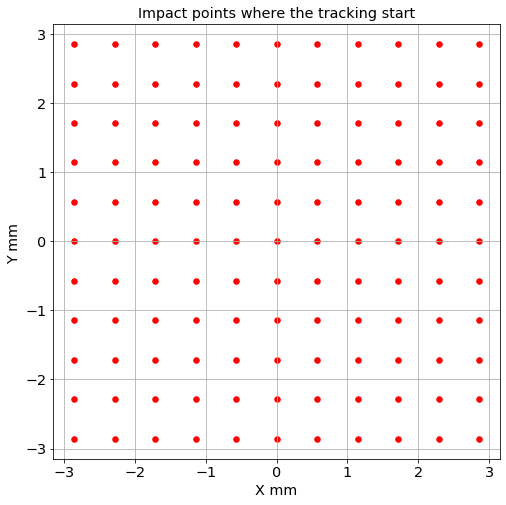

In [64]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')
plt.xlabel("X mm")
plt.ylabel("Y mm ")
plt.title("Impact points where the tracking start")

Text(0.5, 1.0, 'Impact points where the tracking start')

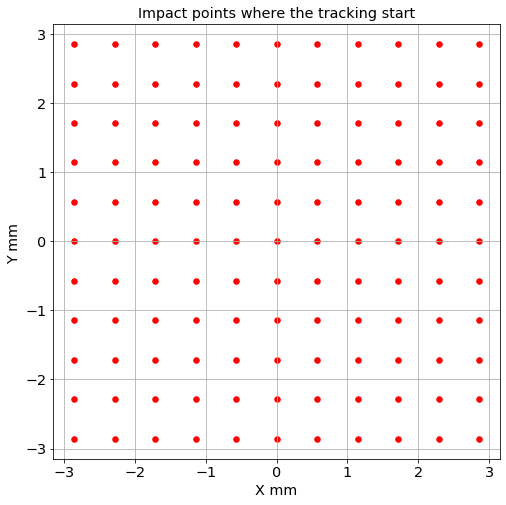

In [65]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X mm")
plt.ylabel("Y mm ")
plt.title("Impact points where the tracking start")

## Check the position of rays at start tracking surface

In [66]:
#def GetCosinusDirector(X,Y,thealpha_x,thealpha_y,f):
#    """
#    The size of X,Y is the number of Rays
#    """
      
#    Norm=np.sqrt( np.power(X+f*np.tan(thealpha_x),2) + np.power(Y+f*np.tan(thealpha_y),2)+ f**2)
#    UX=-(X+f*np.tan(thealpha_x))/Norm
#    UY=-(Y+f*np.tan(thealpha_y))/Norm
#    UZ=f/Norm
#    return UX,UY,UZ    
    

In [67]:
def GetCosinusDirector(X,Y,Z,X0,Y0):
    """   
    Compute the cosinus director of each beam
    
    input :
     X,Y,Z : the coordinate of the beam rays point (where the tracking start)
             The size of X,Y,Z is the number of Rays
             
     X0,Y0 : the center of the beam (where the tracking start)
     
     output :
     UX,UY,UZ : cosinus director of beam rays
     
    """
    
    DeltaX=X0-X
    DeltaY=Y0-Y
    DeltaZ=-Z
    
    
    Norm=np.sqrt( np.power(DeltaX,2) + np.power(DeltaY,2)+ DeltaZ**2)
    UX=DeltaX/Norm
    UY=DeltaY/Norm
    UZ=DeltaZ/Norm
    return UX,UY,UZ    

## Check the beam is converging

In [68]:
# Z00 coordinate where the tracking start
# (X0P,Y0P) coordinate of the Focal point in Focal plane
# (XX0,YY0,Z00) are the coordinate of rays at tracking start plane , in telescope reference coordinate system
UX,UY,UZ=GetCosinusDirector(XX0,YY0,Z00,X0P,Y0P)

In [69]:
Z00

-80.0

Text(0.5, 1.0, 'Vector field')

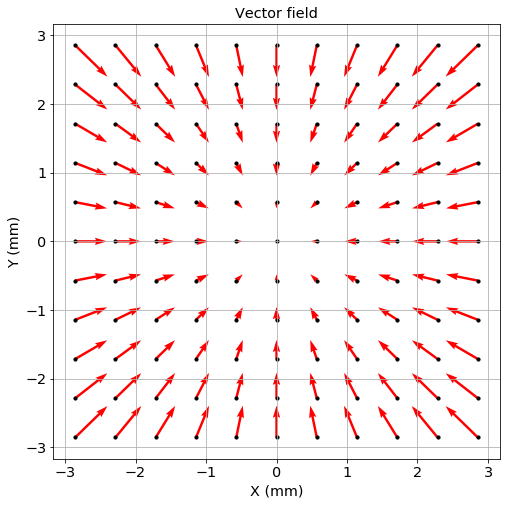

In [70]:
plt.grid()
q = plt.quiver(XX,YY,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX,YY, marker='o', s=10, color='black')
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Vector field")

## Check beam at hologram position

In [71]:
def GetPointPosition(X,Y,DeltaZ,UX,UY,UZ):
    k=DeltaZ/UZ
    theX0=X+k*UX
    theY0=Y+k*UY
    return theX0,theY0

In [72]:
Z1=-Holo_D*m_to_mm  # distance between p

In [73]:
DeltaZ=Z1-Z00

In [74]:
(X1,Y1)=GetPointPosition(XX0,YY0,DeltaZ,UX,UY,UZ)

Text(0.5, 1.0, 'Beam Impact point at the Hologram')

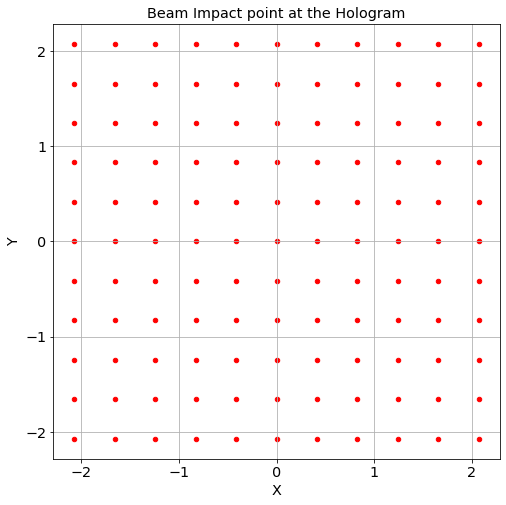

In [75]:
plt.scatter(X1,Y1, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Beam Impact point at the Hologram")

## Check convergence

In [76]:
Xout=XX0.flatten()
Yout=YY0.flatten()

In [77]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [78]:
Zout=np.zeros(NBEAM)+Z00

### Beam in X-Z plane

In [79]:
Filt_D*m_to_mm

80.0

Text(0.5, 1.0, 'Converging Beam X vs Z')

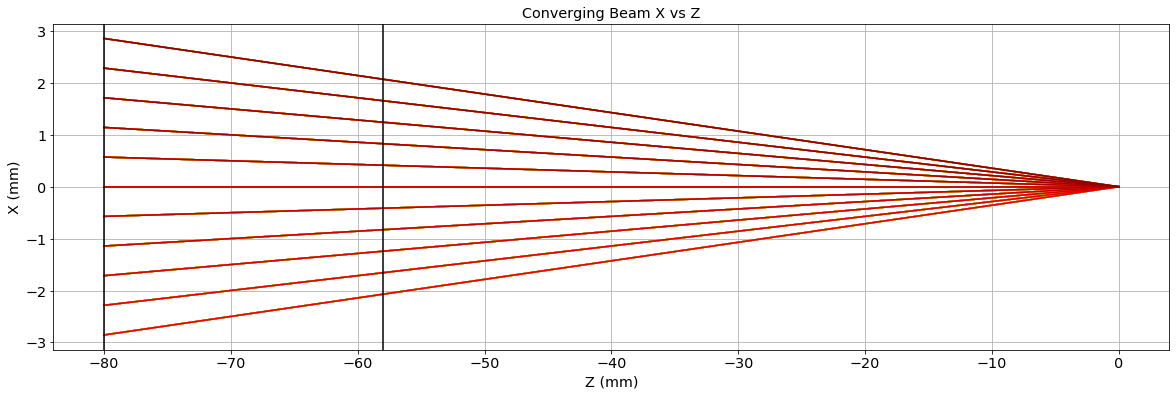

In [80]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Xfinal=Xout[idx]-Zout[idx]*Uout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Xout[idx],Xfinal],color=all_colors[idx])
    
plt.axvline(x=Z00,color="k")
plt.axvline(x=Holo_D*m_to_mm,color="k")

plt.grid()
plt.ylabel("X (mm)")
plt.xlabel("Z (mm)")
plt.title("Converging Beam X vs Z")

### Beam in Y-Z plane

Text(0.5, 1.0, 'Converging Beam Y vs Z')

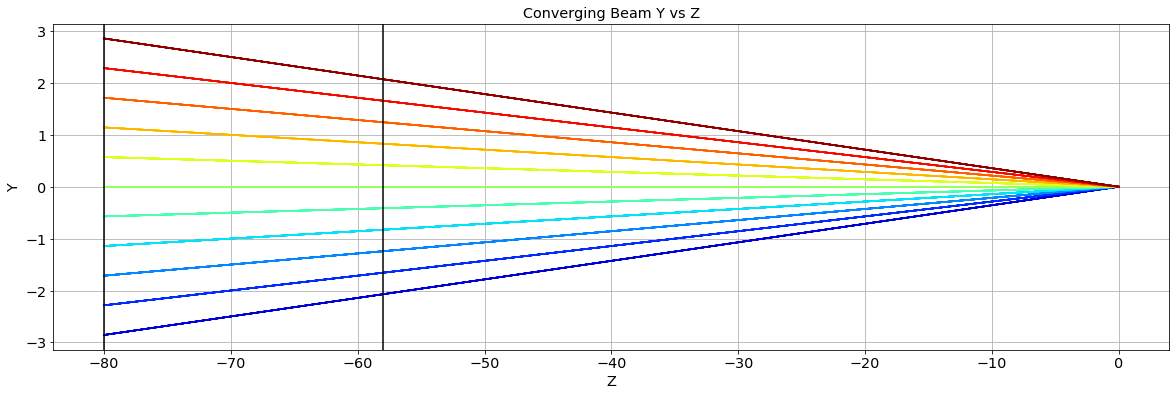

In [81]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Yfinal=Yout[idx]-Zout[idx]*Vout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Yout[idx],Yfinal],color=all_colors[idx])

plt.axvline(x=Z00,color="k")
plt.axvline(x=Holo_D*m_to_mm,color="k")

plt.grid()
plt.ylabel("Y")
plt.xlabel("Z")
plt.title("Converging Beam Y vs Z")

## Create Dataframe

In [82]:
df = pd.DataFrame()

In [83]:
Zout=np.zeros(NBEAM)

In [84]:
allXout=np.concatenate((Xout,Xout,Xout,Xout))
allYout=np.concatenate((Yout,Yout,Yout,Yout))
allZout=np.concatenate((Zout,Zout,Zout,Zout))

In [85]:
allUout=np.concatenate((Uout,Uout,Uout,Uout))
allVout=np.concatenate((Vout,Vout,Vout,Vout))
allWout=np.concatenate((Wout,Wout,Wout,Wout))

In [86]:
wave_b=Wavelength_B*np.ones(NBEAM)
color_b = np.chararray(NBEAM)
color_b[:]='b'

In [87]:
wave_g=Wavelength_G*np.ones(NBEAM)
color_g = np.chararray(NBEAM)
color_g[:]='g'

In [88]:
wave_r=Wavelength_R*np.ones(NBEAM)
color_r = np.chararray(NBEAM)
color_r[:]='r'

In [89]:
wave_i=Wavelength_I*np.ones(NBEAM)
color_i = np.chararray(NBEAM)
color_i[:]='k'

In [90]:
Wave=np.concatenate((wave_b,wave_g,wave_r,wave_i))

In [91]:
allcolor=np.concatenate((color_b,color_g,color_r,color_i))

In [92]:
df["X0"]=allXout
df["Y0"]=allYout
df["Z0"]=allZout
df["U0"]=allUout
df["V0"]=allVout
df["W0"]=allWout
df["wave"]=Wave
df["col"]=allcolor
df["X1"]= np.zeros(NWL*NBEAM) 
df["Y1"]= np.zeros(NWL*NBEAM) 
df["Z1"]= np.zeros(NWL*NBEAM) 
df["X2"]= np.zeros(NWL*NBEAM) 
df["Y2"]= np.zeros(NWL*NBEAM) 
df["Z2"]= np.zeros(NWL*NBEAM) 
df["X3"]= np.zeros(NWL*NBEAM) 
df["Y3"]= np.zeros(NWL*NBEAM) 
df["Z3"]= np.zeros(NWL*NBEAM)
df["Xgoal"]= np.zeros(NWL*NBEAM)   # required for AutoAdjust
df["Ygoal"]= np.zeros(NWL*NBEAM) 
df["Xfinal"]= np.zeros(NWL*NBEAM) 
df["Yfinal"]= np.zeros(NWL*NBEAM) 
df["Zfinal"]= -np.ones(NWL*NBEAM)*Z00

In [93]:
df

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Y2,Z2,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal
0,-2.856536,-2.856536,0.0,0.035661,0.035661,0.998727,0.0004,b'b',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
1,-2.285228,-2.856536,0.0,0.028536,0.035669,0.998956,0.0004,b'b',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
2,-1.713921,-2.856536,0.0,0.021405,0.035676,0.999134,0.0004,b'b',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
3,-1.142614,-2.856536,0.0,0.014272,0.035680,0.999261,0.0004,b'b',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
4,-0.571307,-2.856536,0.0,0.007137,0.035683,0.999338,0.0004,b'b',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0.0,-0.007137,-0.035683,0.999338,0.0010,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
480,1.142614,2.856536,0.0,-0.014272,-0.035680,0.999261,0.0010,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
481,1.713921,2.856536,0.0,-0.021405,-0.035676,0.999134,0.0010,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
482,2.285228,2.856536,0.0,-0.028536,-0.035669,0.998956,0.0010,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [94]:
header = "{} rays {}".format(NWL*NBEAM,Beam4_Rayfile_RAY)
print(header)

484 rays Beam4_Rayfile_484_allwl_m00_m00.RAY


In [95]:
# Need to format well output for BeamFour  (May 2020)
writer = pd.ExcelWriter(Beam4_Rayfile_EXCEL,engine='xlsxwriter')
df.to_excel(writer, index=False,sheet_name="Sheet1",float_format="%2.7f",header=True)
writer.save()